Explained Variance (Contribution Rates): [0.46845601 0.29483355]
Cumulative Explained Variance: [0.46845601 0.76328956]
Unnamed: 0       Model  Relevance  Assumption  Stereotyping  \
0               GPT3.5   0.165319    2.100166     -6.729104   
1                 GPT4  10.720152    9.509812    -25.590041   
2                 BARD   4.674743   -0.073967     -1.106553   
3                Llama   3.882008   -4.094721     18.293299   
4               Claude  17.178124   -8.422515      4.568144   
5           Mistral AI  12.887279  -22.922455    -11.197144   
6           Gemini Pro   0.000000  -10.821566     24.435795   
7                 pplx  17.051510   -6.962700     11.296625   
8             deepseek  31.215461  -15.234340    -10.903008   

Unnamed: 0  Representation Bias  Neutrality  
0                      2.302223    2.492034  
1                      1.469698    1.469698  
2                     -1.307745   -2.189437  
3                     -9.731610   -8.402155  
4                  

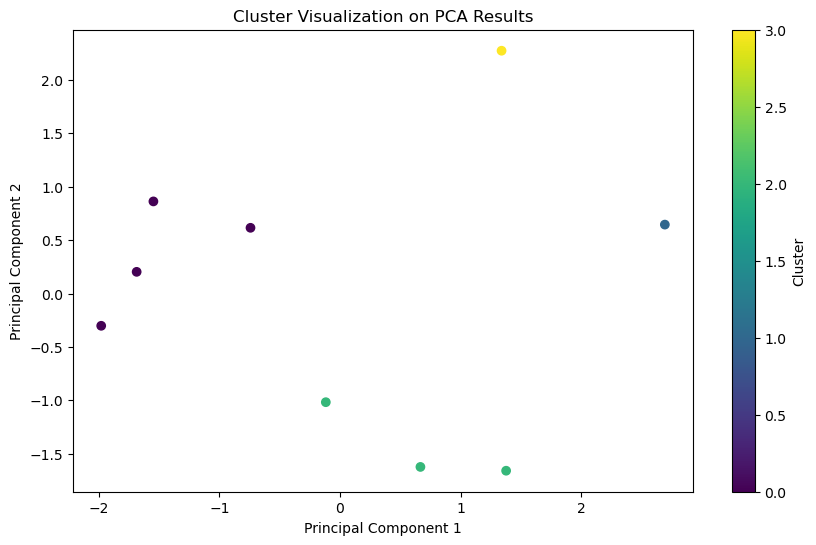

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Ensure necessary packages are installed
!pip install scikit-learn matplotlib

# Load the CSV data
file_path_csv = 'ここにファイルに入れてください（file pathです）'
data_csv = pd.read_csv(file_path_csv)

# Transposing the data to make models the instances
model_data_csv = data_csv.set_index('Unnamed: 0').T

# Standardizing the transposed data
scaler_csv = StandardScaler()
model_data_csv_scaled = scaler_csv.fit_transform(model_data_csv)

# Apply PCA to the scaled data
pca = PCA(n_components=2)  # You can adjust n_components to the number of components you want to consider
pca_result = pca.fit_transform(model_data_csv_scaled)

# Explained variance (contribution rate) and cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance (Contribution Rates):", explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

# Applying k-means clustering to the PCA-transformed data with 4 clusters
kmeans_csv = KMeans(n_clusters=4, random_state=0)
clusters = kmeans_csv.fit_predict(pca_result)

# Show the resulting clusters
print(model_data_csv.reset_index().rename(columns={'index': 'Model'}))

# Create a scatter plot to visualize the clusters using PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization on PCA Results')
plt.colorbar(label='Cluster')
plt.show()

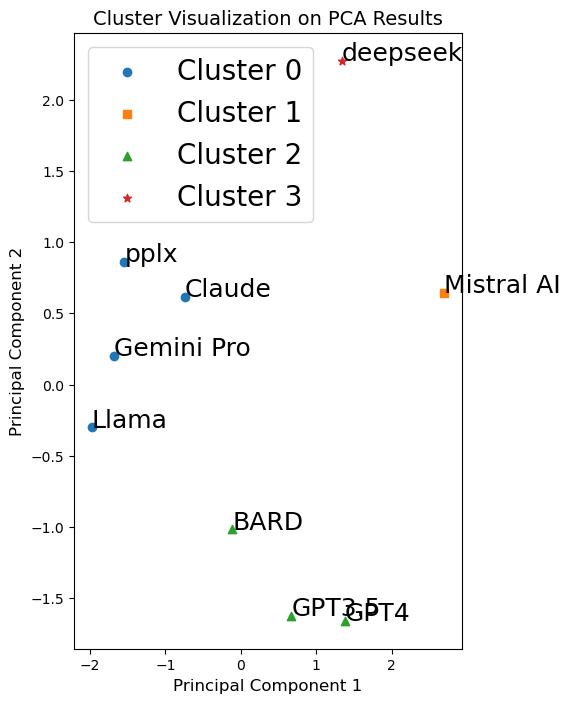

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Transposing the data to make models the instances
model_data_csv = data_csv.set_index('Unnamed: 0').T

# Standardizing the transposed data
scaler_csv = StandardScaler()
model_data_csv_scaled = scaler_csv.fit_transform(model_data_csv)

# Apply PCA to the scaled data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(model_data_csv_scaled)

# K-means clustering
kmeans_csv = KMeans(n_clusters=4, random_state=0)
clusters = kmeans_csv.fit_predict(pca_result)

# Include cluster labels in the data frame for clarity
model_data_csv['Cluster'] = clusters

# Define different markers for each cluster
markers = ['o', 's', '^', '*']  # Circle, square, triangle up, star

# Visualization
plt.figure(figsize=(5, 8))
for cluster in np.unique(clusters):
    plt.scatter(pca_result[clusters == cluster, 0], pca_result[clusters == cluster, 1], marker=markers[cluster], label=f'Cluster {cluster}')
    for i, txt in enumerate(model_data_csv.index[clusters == cluster]):
        plt.annotate(txt, (pca_result[clusters == cluster, 0][i], pca_result[clusters == cluster, 1][i]), fontsize=18)  # Increase fontsize for annotations

plt.xlabel('Principal Component 1', fontsize=12)  # Increase fontsize for X-axis label
plt.ylabel('Principal Component 2', fontsize=12)  # Increase fontsize for Y-axis label
plt.title('Cluster Visualization on PCA Results', fontsize=14)  # Increase fontsize for title
plt.legend(fontsize=20)  # Increase fontsize for legend
plt.show()



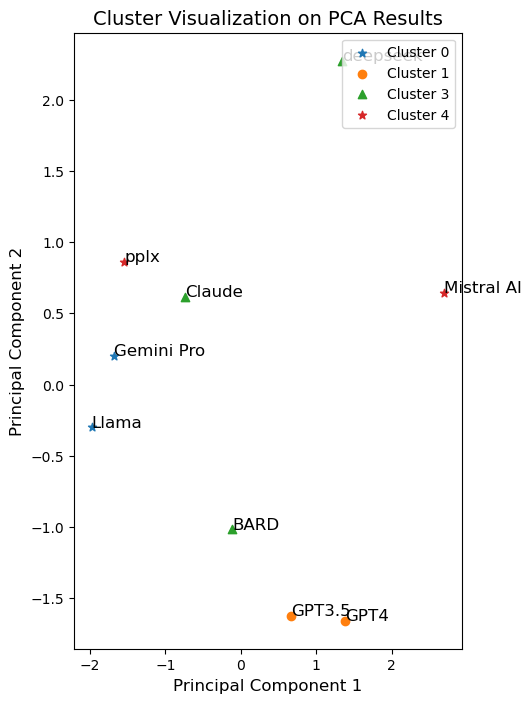

In [36]:
# Using the same setup as before, this code snippet will use manual cluster assignments.
# Make sure to replace 'data_csv' with your actual loaded data.

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming data_csv is already loaded as before and 'Unnamed: 0' is your index with model names
model_data_csv = data_csv.set_index('Unnamed: 0').T

# Standardizing the transposed data
scaler_csv = StandardScaler()
model_data_csv_scaled = scaler_csv.fit_transform(model_data_csv)

# Apply PCA to the scaled data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(model_data_csv_scaled)

# Manually assign clusters based on the model names
manual_clusters = {
    'GPT3.5': 1, 'GPT4': 1,         # Cluster 1
    'LLama2 70B': 2, 'Gemini-Pro': 2, # Cluster 2
    'Claude': 3, 'BARD': 3, 'deepseek': 3, # Cluster 3
    'Mistral AI': 4, 'pplx': 4       # Cluster 4
}

# Create a cluster array based on the manual assignments
clusters = np.array([manual_clusters.get(model, 0) for model in model_data_csv.index])

# Define different markers for each cluster
markers = ['o', 's', '^', '*']  # Circle, square, triangle up, star

# Visualization
plt.figure(figsize=(5, 8))
for cluster_num in np.unique(clusters):
    # Identify indexes of rows in this cluster
    idx = clusters == cluster_num
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], 
                marker=markers[cluster_num-1], label=f'Cluster {cluster_num}')
    # Annotate points with their model names
    for i in np.where(idx)[0]:
        plt.annotate(model_data_csv.index[i], 
                     (pca_result[i, 0], pca_result[i, 1]), 
                     fontsize=12)

# Labeling the axes and title
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('Cluster Visualization on PCA Results', fontsize=14)

# Showing legend and plot
plt.legend(fontsize=10)
plt.show()


Explained Variance (Contribution Rates): [0.73675301 0.15486889]
k_range: [[ 2.64300244  0.40056549]
 [-1.69317922  3.10510709]
 [-2.19405976 -0.21429599]
 [-1.1916377  -0.41257457]
 [-2.01687982  0.0225839 ]
 [-0.96294553 -1.44296859]
 [-1.14837561 -1.34437376]
 [-0.06192548 -0.1652    ]
 [ 6.62600068  0.0511564 ]]


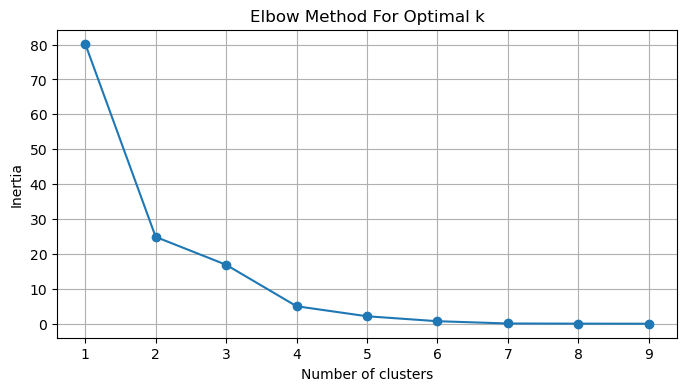

cluster; [2 0 0 0 0 0 0 0 1]
k_mean; KMeans(n_clusters=3, random_state=0)


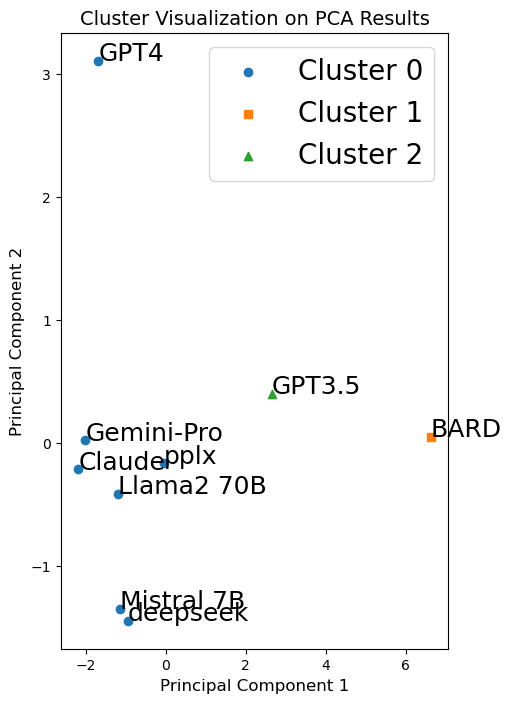

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
data_csv = pd.read_csv("/Users/ripito/Documents/Document/5th Year TGUISS/課題研究/6th/課題研究 v2/cev.csv")

# Transposing the data to make models the instances
model_data_csv = data_csv.set_index('CEV').T

# Standardizing the transposed data
scaler_csv = StandardScaler()
model_data_csv_scaled = scaler_csv.fit_transform(model_data_csv)

# Apply PCA to the scaled data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(model_data_csv_scaled)

# Explained variance (contribution rate) and cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance (Contribution Rates):", explained_variance)

# Finding the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)
    
print("k_range:", pca_result)
# Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# K-means clustering with the optimal number of clusters
optimal_k = 3  # Change based on elbow plot result
kmeans_csv = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans_csv.fit_predict(pca_result)
model_data_csv['Cluster'] = clusters

# Define different markers for each cluster
markers = ['o', 's', '^']  # Circle, square, triangle up

print("cluster;", clusters)
print("k_mean;", kmeans_csv)

# Visualization of clusters
plt.figure(figsize=(5, 8))
for cluster in np.unique(clusters):
    plt.scatter(pca_result[clusters == cluster, 0], pca_result[clusters == cluster, 1], marker=markers[cluster], label=f'Cluster {cluster}')
    for i, txt in enumerate(model_data_csv.index[clusters == cluster]):
        plt.annotate(txt, (pca_result[clusters == cluster, 0][i], pca_result[clusters == cluster, 1][i]), fontsize=18)  # Increase fontsize for annotations

plt.xlabel('Principal Component 1', fontsize=12)  # Increase fontsize for X-axis label
plt.ylabel('Principal Component 2', fontsize=12)  # Increase fontsize for Y-axis label
plt.title('Cluster Visualization on PCA Results', fontsize=14)  # Increase fontsize for title
plt.legend(fontsize=20)  # Increase fontsize for legend
plt.show()